In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from fedland.utils import load_all_training_results, get_experiment_description, plot_results_overview

In [17]:
df = load_all_training_results(results_path="../results")
experiment_ids = [
    "f36e2c39-34cb-4b03-a2f9-68cb33bdbebe", # 2 clients IID balanced resnet fedavg
    "8b1d3a21-7e63-40e7-be21-16d69b0b0aac", # 2 clients IID balanced resnet fedadam
    "735bb18d-fb33-4be3-adaf-78289b69319d", # 2 clients IID Imbalanced resnet fedavg
    "df3a0e29-0fc7-4cd5-838f-326822e098fc", # 2 clients IID Imbalanced resnet fedadam
    "d9ae0c7d-e2bb-4ee4-94e2-4870ae5eb80a", # 2 clients non-IID Balanced resnet fedavg
    "c986f32b-b752-45d2-ae81-9ba9b48289f7", # 2 clients non-IID Balanced resnet fedadam
    "01960312-13a0-4f41-9e14-31508c3c02ba", # 2 clients non-IID Imbalanced resnet fedavg
    "b4e8e959-5146-4418-9a89-ffe9def5dcbd", # 2 clients non-IID Imbalanced resnet fedadam
]
df = df[df["experiment_id"].isin(experiment_ids)]
df = df.sort_values(by=["experiment_id", "client_index", "timestamp"])
df['iteration'] = df.groupby(['experiment_id', 'client_index']).cumcount() + 1
df = df.reset_index()
# for _, row in df.loc[0:100].iterrows():
#     print(f"ci:{row['client_index']}, i:{row['iteration']}")
df.info()

Error reading dir 0: [Errno 2] No such file or directory: '../results/ea1b48b3-de30-4c49-9d75-aed48a676d88/0/client.json'
Error reading dir 1: [Errno 2] No such file or directory: '../results/ea1b48b3-de30-4c49-9d75-aed48a676d88/1/client.json'
Error reading dir 0: [Errno 2] No such file or directory: '../results/5f53ca64-a84c-4d06-b2e5-0a48e47b3c77/0/client.json'
Error reading dir 1: [Errno 2] No such file or directory: '../results/5f53ca64-a84c-4d06-b2e5-0a48e47b3c77/1/client.json'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              1440 non-null   int64         
 1   epoch              1440 non-null   int64         
 2   learning_rate      1440 non-null   float64       
 3   batch_size         1440 non-null   int64         
 4   len_train_indices  1440 non-null   int64         
 5   len_test_indice

['ResNet CIFAR-10, 2 clients non-IID Imbalanced resnet fedavg', 'ResNet CIFAR-10, 2 clients IID Imbalanced resnet fedavg', 'ResNet CIFAR-10, 2 clients IID balanced resnet fedadam', 'ResNet CIFAR-10, 2 clients non-IID Imbalanced resnet fedadam', 'ResNet CIFAR-10, 2 clients non-IID Balanced resnet fedadam', 'ResNet CIFAR-10, 2 clients non-IID Balanced resnet fedavg', 'ResNet CIFAR-10, 2 clients IID Imbalanced resnet fedadam', 'ResNet CIFAR-10,2 clients IID balanced resnet fedavg']


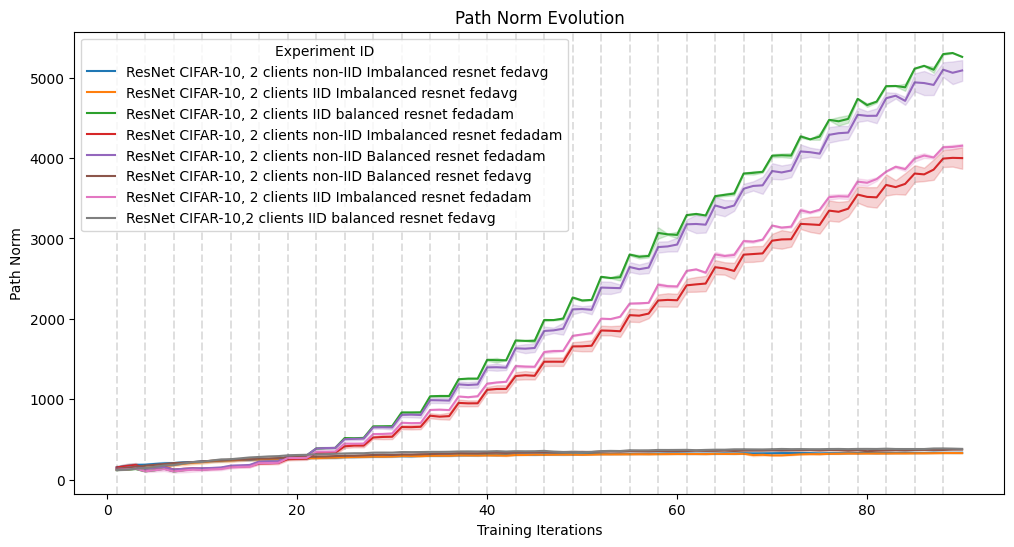

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="iteration", y="path_norm", hue="experiment_id")
# sns.lineplot(data=df, x="iteration", y="global_path_norm", hue="experiment_id")
for epoch_val in df[df['epoch'] == 0]['iteration']:
    plt.axvline(x=epoch_val, color='gray', linestyle='--', alpha=0.01)
plt.title("Path Norm Evolution")
plt.xlabel("Training Iterations")
plt.ylabel("Path Norm")
handles, labels = plt.gca().get_legend_handles_labels()
aliased_labels = [get_experiment_description(label, "../results") for label in labels]
print(aliased_labels)
plt.legend(handles=handles, labels=aliased_labels, title="Experiment ID")
plt.show()

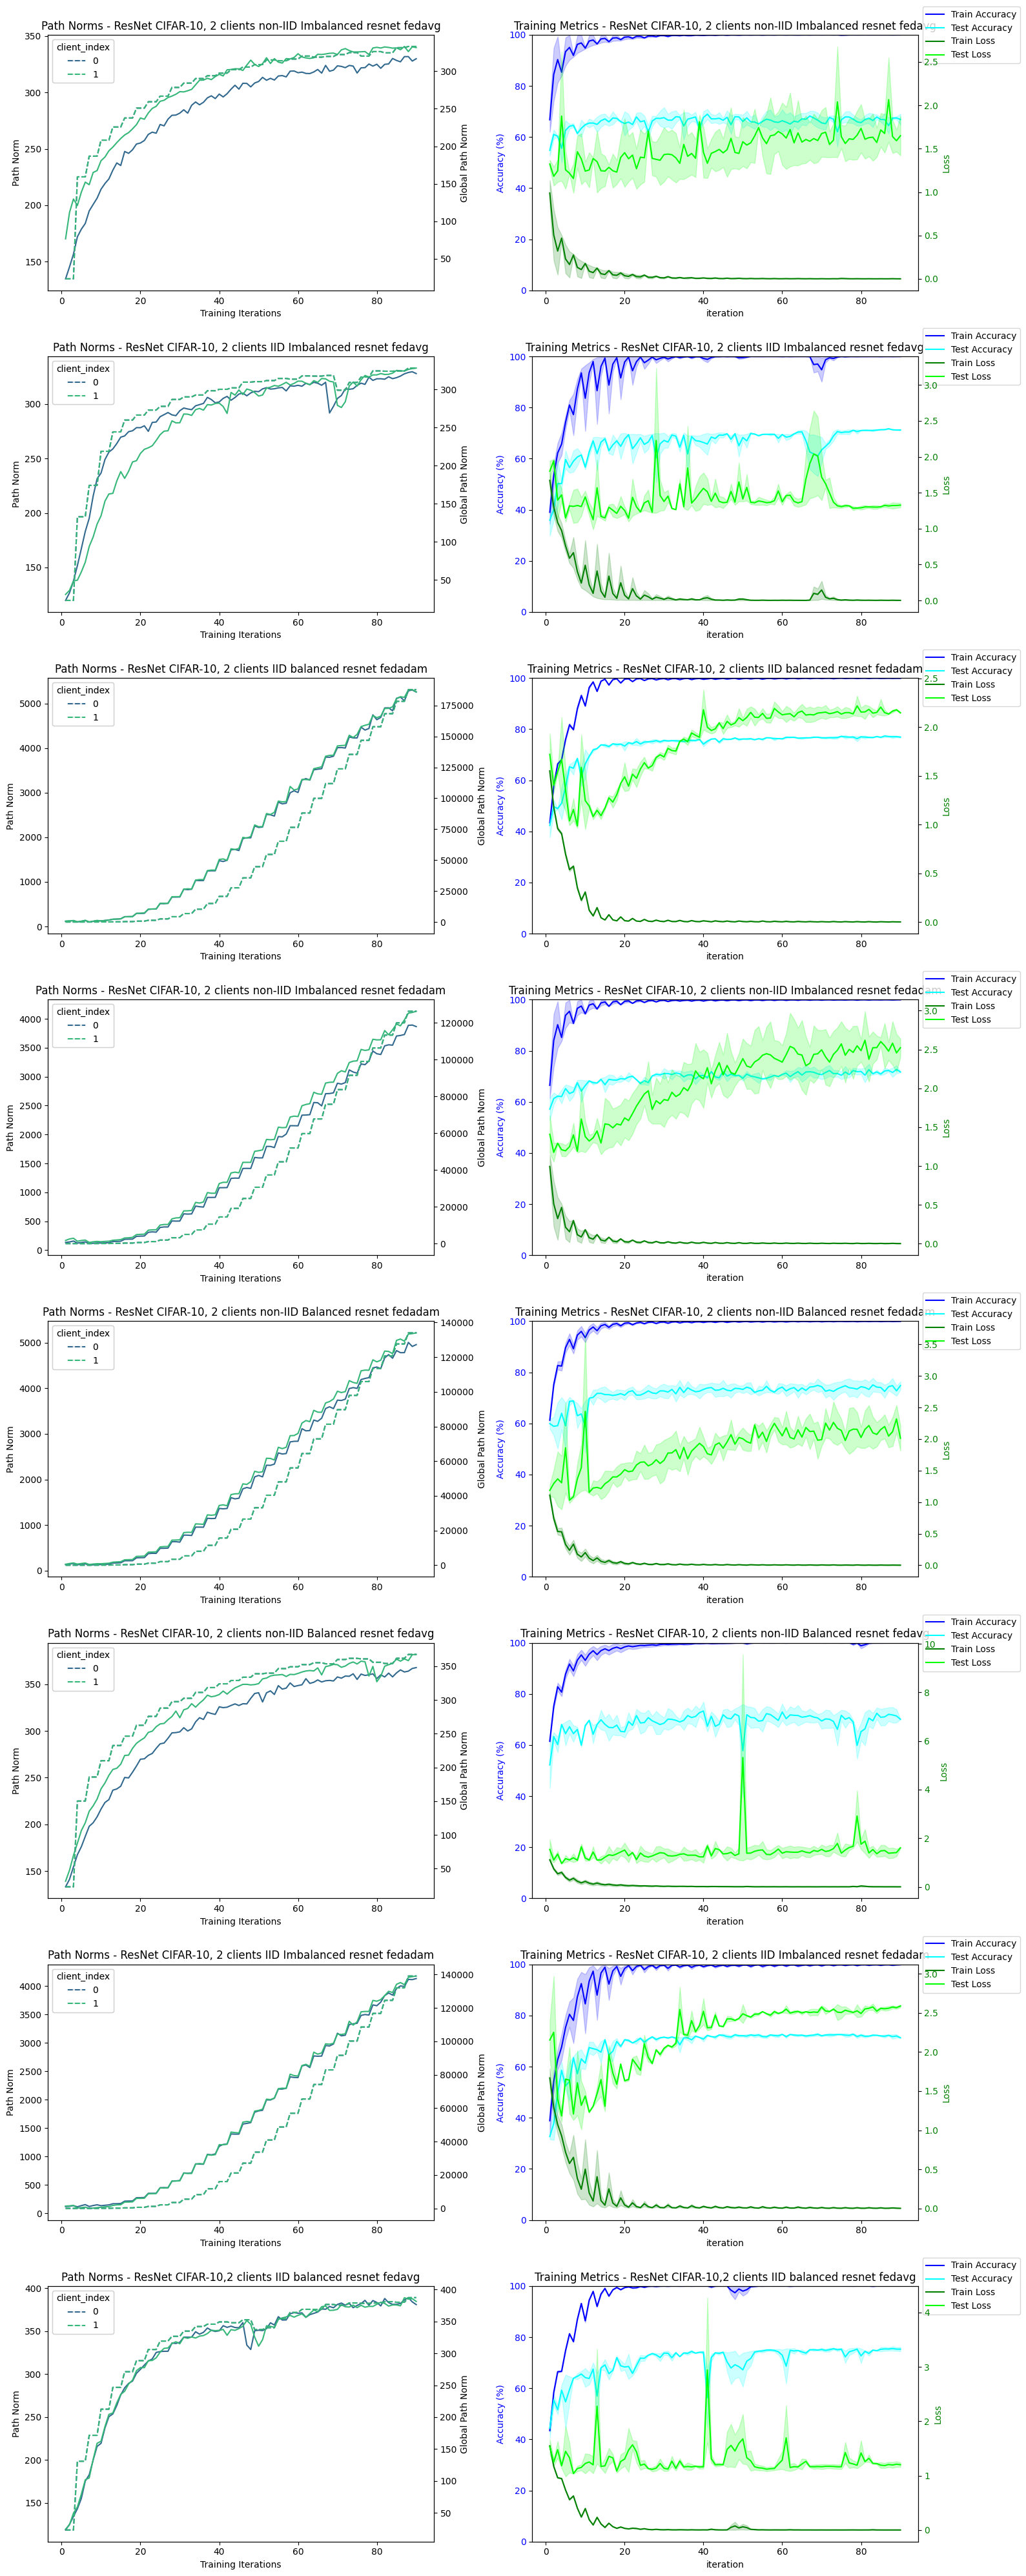

In [19]:
plot_results_overview(df, "../results")